### Проект по удержанию клиентов сети фитнес- центров

#### Задача: 
провести анализ и подготовить план действий по удержанию клиентов сети фитнес- центров


#### Ход выполнения работы:
**Шаг 1.** Загрузка данных

**Шаг 2.** Проведите исследовательский анализ данных (EDA)

**Шаг 3.** Построение модели прогнозирования оттока клиентов

**Шаг 4.** Кластеризация клиентов

**Шаг 5.** Выводы и базовые рекомендации по работе с клиентами

**Описание данных:**

* 'gender'  — пол;

* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

* 'Phone' — наличие контактного телефона;

* 'Age' — возраст;

* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

* 'Group_visits' — факт посещения групповых занятий;

* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

* 'Churn' — факт оттока в текущем месяце.

**Шаг 1. Загрузка данных**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

Мы видим, что в таблице - 14 столбцов и 4 тыс строк, данных нет пропусков и дублей, все значения в столбцах относятся к типам  int или float. Можем приступать к следующему шагу:

**Шаг 2. Проведите исследовательский анализ данных (EDA)**

Посмотрим на датасет: изучим средние значения и стандартные отклонения;

In [6]:
df.describe() .T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Мы видим, что к категориальным переменным относятся:
gender,
Near_Location,
Partner,
Promo_friends,
Phone, 
Group_visits, Contract_period, Churn
Остальные переменные -численные.
Возраст - от 18 до 41, что выглядит адекватно.

Построим гистограммы для остальных, чтобы проверить - есть ли анамальные выбросы в значениях.

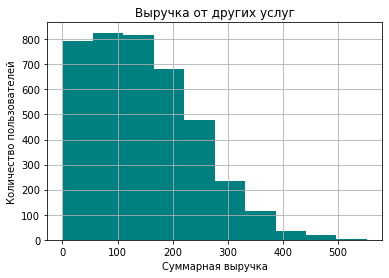

In [7]:
plt.hist(df.Avg_additional_charges_total, bins = 10, color = 'teal')
plt.title('Выручка от других услуг')
plt.xlabel('Суммарная выручка')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Аномальных значений нет.

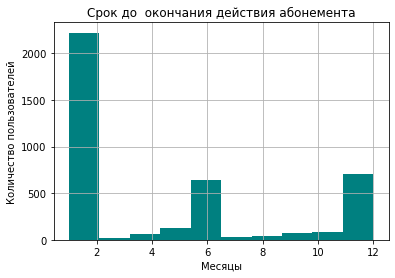

In [8]:
plt.hist(df.Month_to_end_contract, bins = 10, color = 'teal')
plt.title('Срок до  окончания действия абонемента')
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

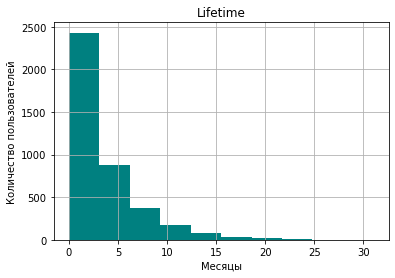

In [9]:
plt.hist(df.Lifetime, bins = 10, color = 'teal')
plt.title('Lifetime')
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

лайфтайм 0 не бывает

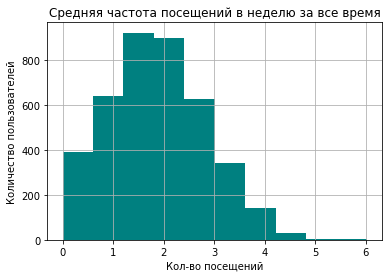

In [10]:
plt.hist(df.Avg_class_frequency_total, bins = 10, color = 'teal')
plt.title('Средняя частота посещений в неделю за все время')
plt.xlabel('Кол-во посещений')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Редкие фитнес любители посещают зал 6 раз в неделю. Основная масса ожидаемо занимается 2-3- раза в неделю.

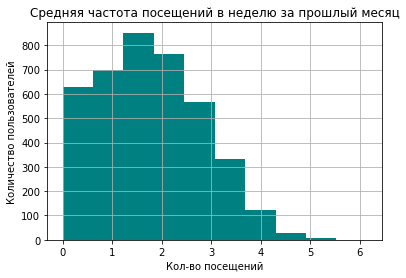

In [11]:
plt.hist(df.Avg_class_frequency_current_month, bins = 10, color = 'teal')
plt.title('Средняя частота посещений в неделю за прошлый месяц')
plt.xlabel('Кол-во посещений')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [12]:
churn = df.groupby('Churn').mean()
(churn
 .T
 .style
 .background_gradient(cmap='Pastel1', axis=1) 
)

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


* Мужчин и женщин среди "отваливающихся" и "остающихся"  - поровну
* Отток больше у людей  - не живущих в районе с фитнес-центром. 
* Сотрудники компаний-партнеров клуба более лояльны и отток у них меньше
* Пользователи, пришедшие в рамках акции "приведи друга" меньше "отваливаются" по сравнению с обычными
* Телефоны оставляют и те и другие примерно в равном количестве
* Чаще отваливаются те, у кого месячный абонемент, чем те, у кого абонемент - на пол года. 
* Пользователи, посещающие групповые занятия, отваливаются гораздо реже. 
* Чаще отваливаются пользователи помладше (средний возраст - 27) - возможно у пользователей более старшего возраста уже больше определенности с работой и местом жительства, они более постоянны, потому отток у пользователей постарше- меньше.
* Те, кто покупают больше доп. услуг - чаще остаются. 
* Чаще "отваливаются" те, у кого до окончания абонемента- в среднем 1,5 мес.
* Чаще отваливаются клиенты со средним  лайфтаймом 0.9
* Чаще "отваливаются" те, кто ходит на занятия мало-всего 1 раз в неделю (либо со временем стали ходить реже и реже и в итоге-перестали совсем)


In [13]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


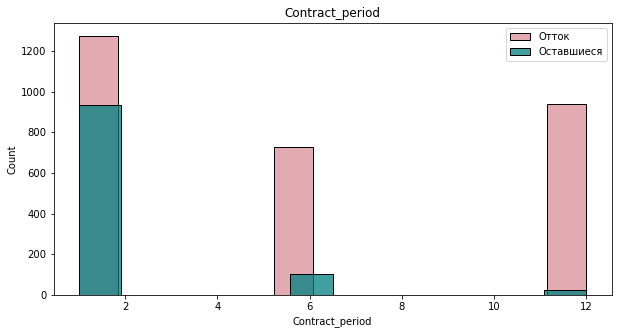

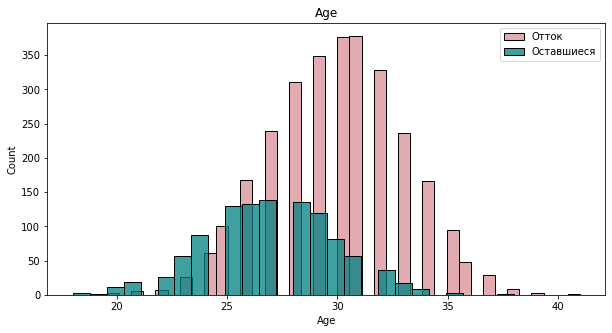

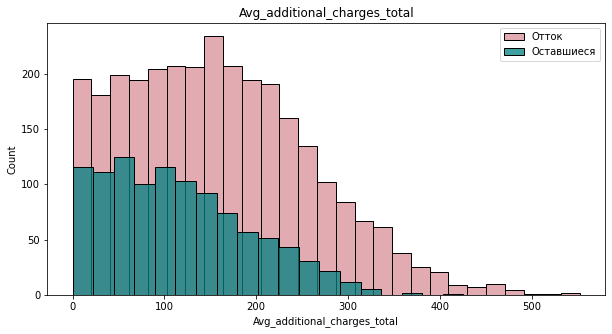

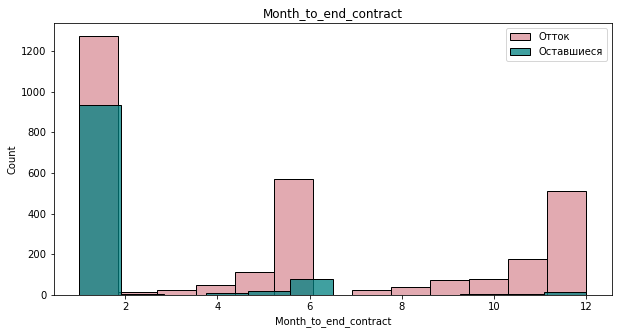

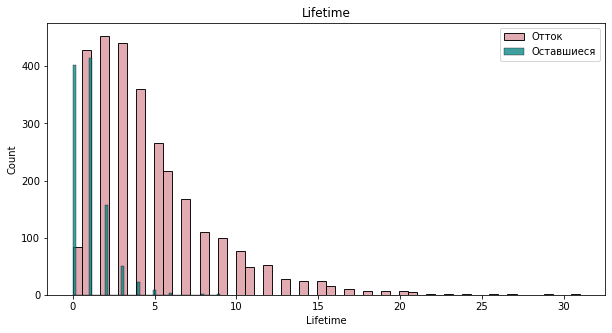

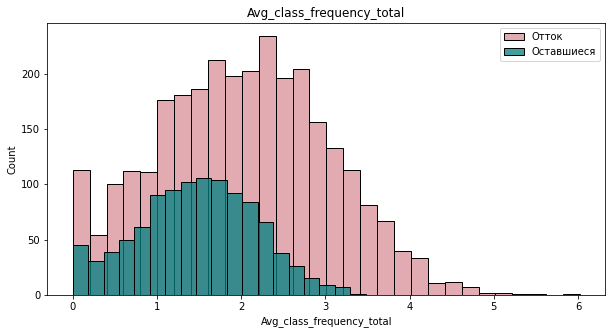

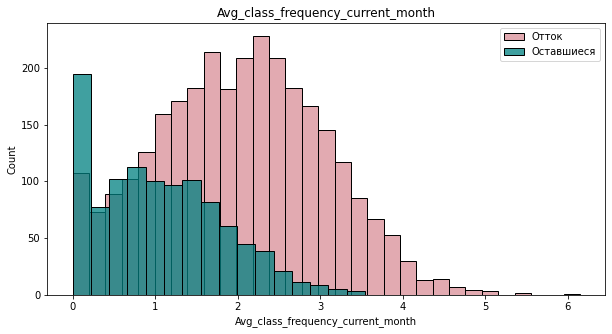

In [14]:
left = df.query('Churn==1')
stayed = df.query('Churn==0')
histplot_columns = ['Contract_period', 'Age', 
                    'Avg_additional_charges_total', 
                    'Month_to_end_contract', 'Lifetime', 
                    'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for column in histplot_columns:
    plt.figure(figsize=(10,5)) 
    plt.title(column)
    sns.histplot(stayed[column],color = '#b72b3d', alpha=0.4)
    sns.histplot(left[column], color = "teal" )
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

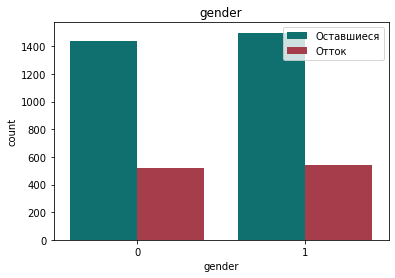

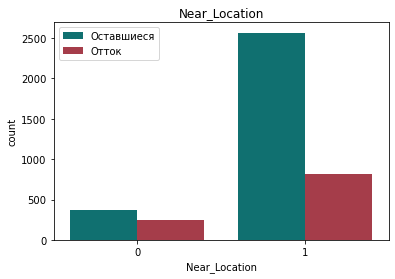

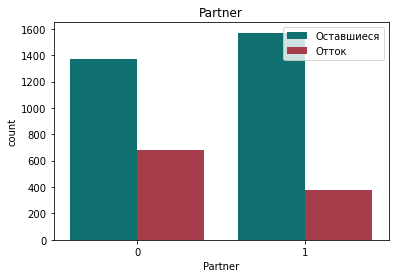

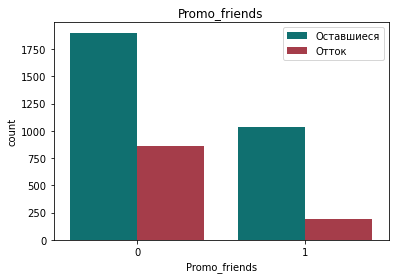

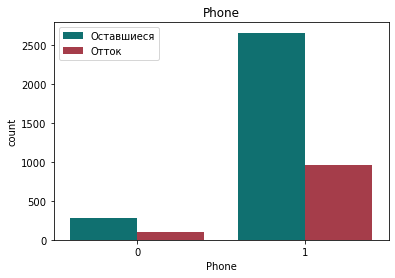

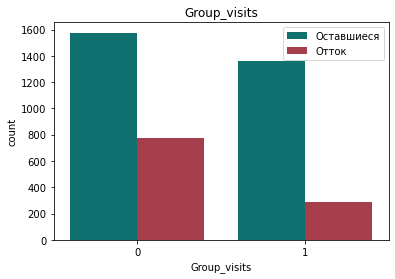

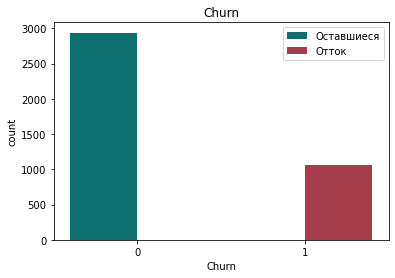

In [15]:
for column in df.columns:
    if column not in histplot_columns:
        sns.countplot(data=df, x=column, hue="Churn", palette=['teal','#b72b3d'])
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

По графикам мы можем сказать тоже самое, построим матрицу корреляций и отобразим её:


In [16]:
(df.corr()
 .T
 .style
 .background_gradient(cmap='RdPu', axis=1) 
)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


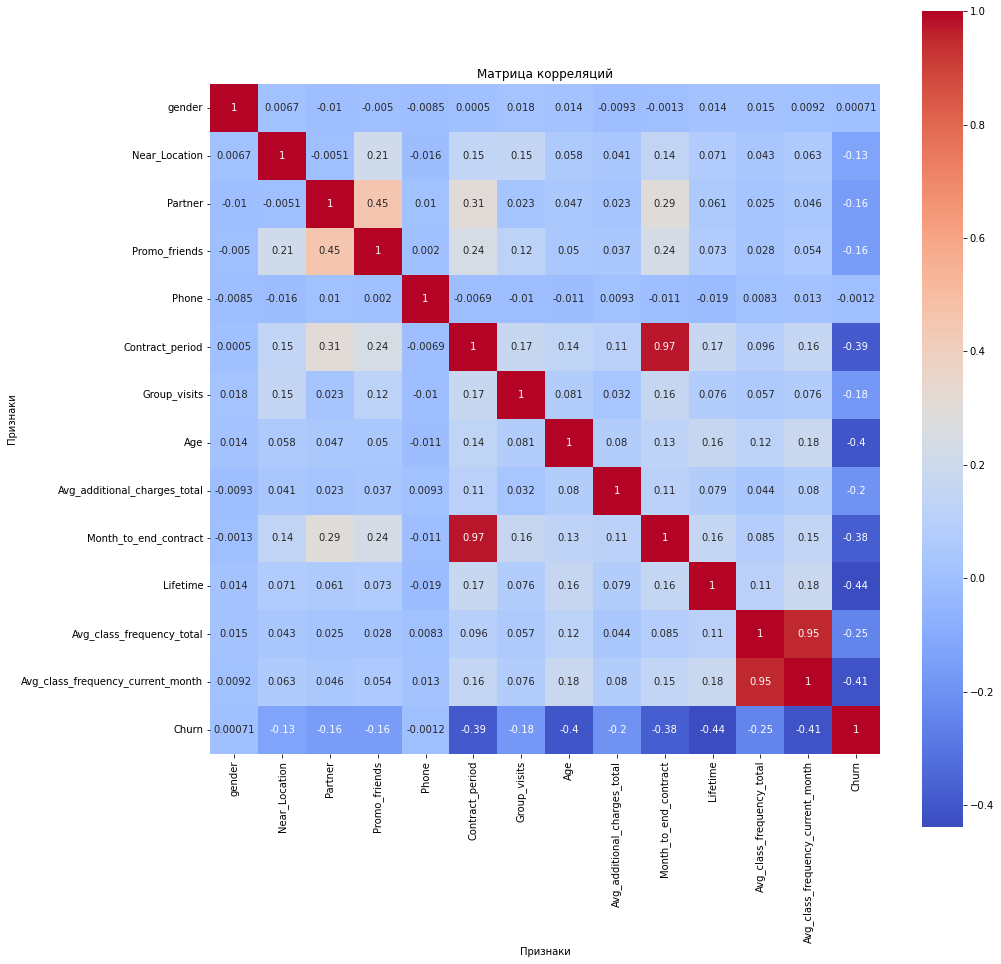

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, square=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.xlabel('Признаки') 
plt.ylabel('Признаки') 
plt.show()

* Очень высокая корреляция у 
- Month_to_end_contract/Contract_period, 
- Avg_class_frequency_current_month/Avg_class_frequency_total. 
Явной зависимости отттока от признаков не обнаружено.
* Слабая положительная корреляция от 0,3 до 0,5  - 
- у promo_friends/partner, 
- contract_period/partner, 
* Слабая отрицательная корреляция - 
- Churn/contract_period, 
- Churn/Lifetime, 
- Churn/Avg_class_frequency_current_month, 
- Churn/month_to_end_contract,
- Churn/Age
* Почти нулевая корреляция для Churn у признаков gender и phone

**Шаг 3. Построение модели прогнозирования оттока клиентов**

Разделим данные на признаки и целевую переменную:

In [18]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

Разделим модель на обучающую и валидационную выборку:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные

In [20]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test) 

##### Обучим модель на train-выборке логистической регрессией:

In [21]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_st, y_train)

LogisticRegression(solver='liblinear')

Воспользуемся обученной моделью, чтобы сделать прогнозы:

In [22]:
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

Посмотрим на важность признаков:

In [23]:
coef_reg = pd.DataFrame(list(X_train.columns)).copy()
coef_reg.insert(len(coef_reg.columns),"Coefs",model.coef_.transpose())
coef_reg['Coefs'] = coef_reg['Coefs'].abs()
coef_reg.sort_values(by = 'Coefs', ascending = False)

,0,Coefs
12,Avg_class_frequency_current_month,4.426492
10,Lifetime,3.720057
11,Avg_class_frequency_total,3.290506
7,Age,1.074359
5,Contract_period,0.703741
8,Avg_additional_charges_total,0.541020
9,Month_to_end_contract,0.520089
6,Group_visits,0.385778
3,Promo_friends,0.268180
2,Partner,0.082845


##### Обучим модель на train-выборке с помощью случайного леса:

In [24]:
rf_model = RandomForestClassifier(random_state = 0, n_estimators = 100) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [25]:
coef_f = pd.DataFrame(list(X_train.columns)).copy()
coef_f.insert(len(coef_f.columns),"Coefs",rf_model.feature_importances_.transpose())
coef_f['Coefs'] = coef_f['Coefs'].abs()
coef_f.sort_values(by = 'Coefs', ascending = False)

,0,Coefs
10,Lifetime,0.276499
12,Avg_class_frequency_current_month,0.180170
11,Avg_class_frequency_total,0.129883
7,Age,0.119129
8,Avg_additional_charges_total,0.091473
9,Month_to_end_contract,0.068855
5,Contract_period,0.065964
6,Group_visits,0.015652
0,gender,0.012425
2,Partner,0.012285


Выведем все метрики и сравним:

In [26]:
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print ()
print('Метрики для модели случайного леса:') 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели логистической регрессии:
Accuracy: 0.92
Precision: 0.85
Recall: 0.83

Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


C небольшой разницей показатели выше у логистической регрессии, ее и следует использовать дальше.

**Шаг 4. Кластеризация клиентов**

Стандартизируем данные:

In [27]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу расстояний и нарисуем дендрограмму:

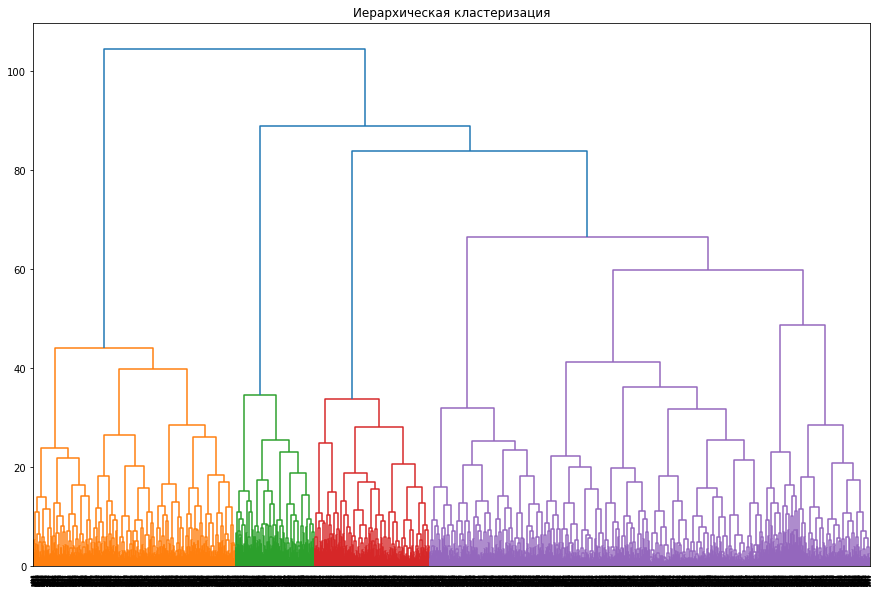

In [28]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 
km = KMeans(n_clusters=5, random_state=0) 

Можно разделить на 4 кластера, но по условию задания мы оставляем 5.

Обучим модель кластеризации:

In [29]:
labels = km.fit_predict(X_sc)

Посмотрим на средние значения признаков:

In [30]:
df['cluster_km'] = labels
mean_df = df.groupby('cluster_km').mean()
mean_df  = mean_df.transpose()
mean_df

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Итак, мы выделили 5 кластеров, в каждом из них примерно равное соотношение мужчин и женщин(50/50).

**0 кластер:**:
 - самый низкий отток (2.8%)
 - большинство живет или работает рядом с фитнес центром (96%)
 - большинство пришло по партнерской программет (78%)
 - многие пришли в рамках акции "приведи друга" - 57%
 - средний возраст - 30 лет
 - длительность текущего абонемента в среднем 10.8 мес
 - в среднем посещают занятия 2 раза в месяц
 - лайфтайм  - 4.7%
 - оставляют номера телефонов
 
**1 кластер:**:
 - отток 26%
 - большинство живет или работает рядом с фитнес центром (86%)
 - средний возраст - 29 лет
 - длительность текущего абонемента в среднем 4.5 мес
 - не оставляют свой номер телефона
 
**2 кластер:**:
 - отток 44%
 - большинство живет или работает не рядом с фитнес центром
 - мало тех, кто пришел в рамках ации "Приведи друга" - 7%
 - средний возраст - 28 лет
 - групповые занятия посещает только 21%(меньшая доля из всех кластеров)
 - длительность текущего абонемента в среднем 2.3 мес
 - не отсавляют номера телефонов

**3 кластер:**:
 - самый высокий отток  - 51.4%
 - большинство живет или работает не рядом с фитнес центром
 - из всех кластеров-менимальный процент тех, кто пришел по партнерской программе  - 35%
 - средний возраст - 28 лет
 - реже всех посещяют занятия - 1.2 раза в неделю
 - самый низкий лайфтайм-2.4
 - не оставляют номера телефонов
  
**4 кластер:**:
 - маленький отток  - 6.8%
 - большинство живет или работает рядом с фитнес центром - 97.6%
 - мало тех, кто пришел по партнерской программе  - 35.6%
 - средний возраст - 30 лет
 - оставляют номера телефонов
 - самый высокий лайфтайм-4.9

Построим распределения признаков для кластеров:

In [31]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


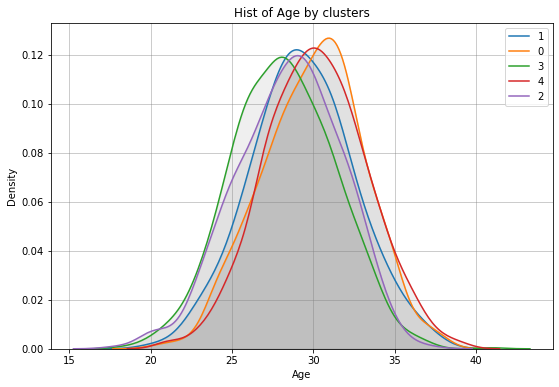

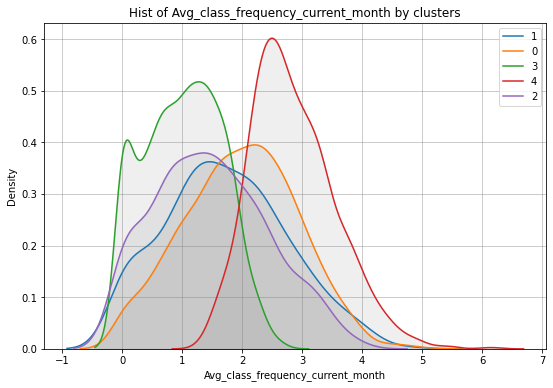

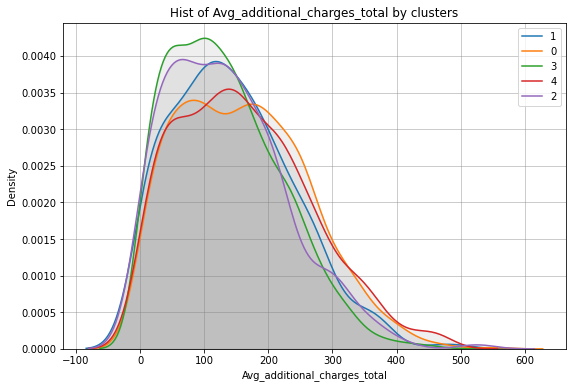

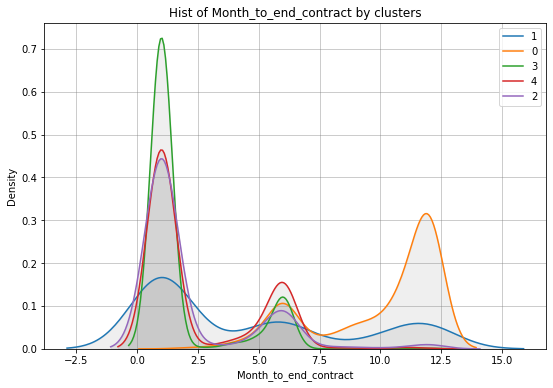

In [34]:
# continuous
for col in ["Age", "Avg_class_frequency_current_month", "Avg_additional_charges_total", "Month_to_end_contract"]:
    fig, ax = plt.subplots(figsize=(9, 6))
    for cl in df['cluster_km'].unique():
        # кривая
        sns.kdeplot(df.query("cluster_km==@cl")[col], ax=ax, label=cl)
        #  заполнение
        x = ax.lines[-1].get_xdata()
        y = ax.lines[-1].get_ydata()
        ax.fill_between(x, 0, y, color='grey', alpha=0.125)
    ax.legend()
    ax.set_title(f'Hist of {col} by clusters')
    ax.grid(color='grey', alpha=0.5);
plt.show()

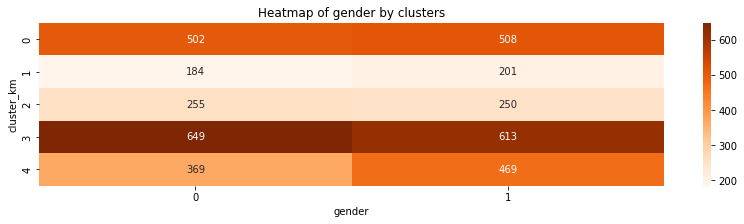

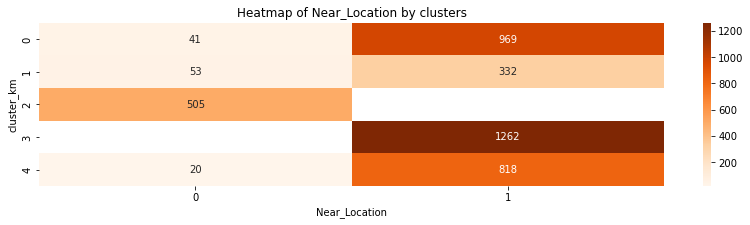

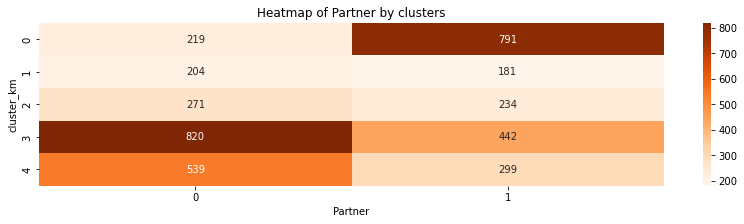

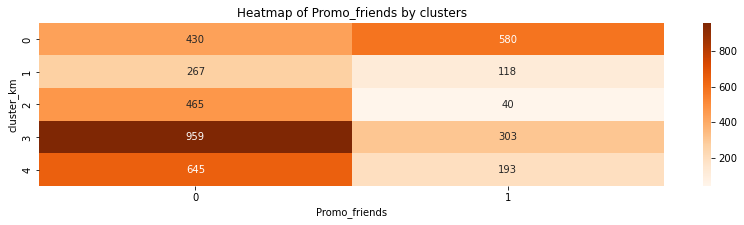

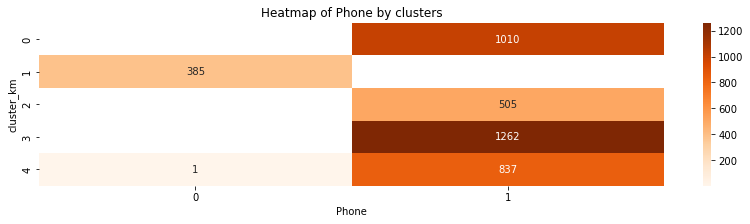

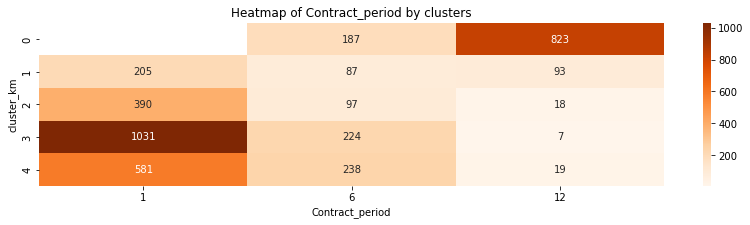

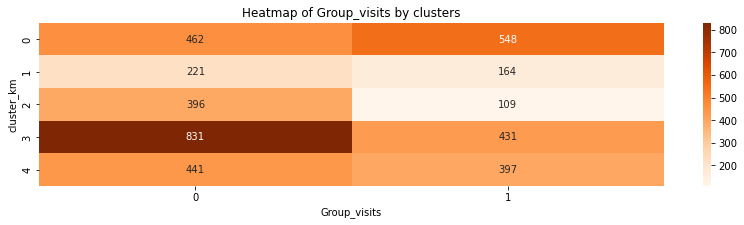

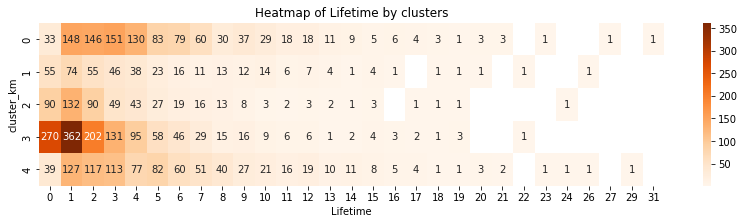

In [35]:
#CODE REVIEW
#discrete
for col in ['gender', 'Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Lifetime']:
    fig, ax = plt.subplots(figsize=(14, 3))
    viz_data = df.reset_index()\
                .pivot_table(
                    index='cluster_km',
                    columns=col,
                    values='index',
                    aggfunc='count'
                    )
    sns.heatmap(viz_data, cmap='Oranges', annot=True, fmt='.0f', ax=ax)
    ax.set_title(f'Heatmap of {col} by clusters')
    ax.grid(False)
    plt.show();

<hr style="border: 2px solid orange;" />

**Выводы и базовые рекомендации по работе с клиентами**

Итак, мы выделили 5 кластеров, в каждом из них примерно равное соотношение мужчин и женщин(50/50).

**0 кластер:**

 - самый низкий отток (2.8%)
 - большинство живет или работает рядом с фитнес центром (96%)
 - большинство пришло по партнерской программет (78%)
 - многие пришли в рамках акции "приведи друга" - 57%
 - средний возраст - 30 лет
 - длительность текущего абонемента в среднем 10.8 мес
 - в среднем посещают занятия 2 раза в месяц
 - лайфтайм - 4.7%
 - оставляют номера телефонов

**1 кластер:**

 - отток 26%
 - большинство живет или работает рядом с фитнес центром (86%)
 - средний возраст - 29 лет
 - длительность текущего абонемента в среднем 4.5 мес
 - не оставляют свой номер телефона

**2 кластер:**

 - отток 44%
 - большинство живет или работает не рядом с фитнес центром
 - мало тех, кто пришел в рамках ации "Приведи друга" - 7%
 - средний возраст - 28 лет
 - групповые занятия посещает только 21%(меньшая доля из всех кластеров)
 - длительность текущего абонемента в среднем 2.3 мес
 - не отсавляют номера телефонов

**3 кластер:**

 - самый высокий отток - 51.4%
 - большинство живет или работает не рядом с фитнес центром
 - из всех кластеров-менимальный процент тех, кто пришел по партнерской программе - 35%
 - средний возраст - 28 лет
 - реже всех посещяют занятия - 1.2 раза в неделю
 - самый низкий лайфтайм-2.4
 - не оставляют номера телефонов

**4 кластер:**

 - маленький отток - 6.8%
 - большинство живет или работает рядом с фитнес центром - 97.6%
 - мало тех, кто пришел по партнерской программе - 35.6%
 - средний возраст - 30 лет
 - оставляют номера телефонов
 - самый высокий лайфтайм-4.9
 
Меньше всего отток у нулевого и 4 кластера, они отличаютмя тем, что пользователи живут или работают рядом с фитнес-центром.
У нулевого кластера большинство пользователей пришло в рамках акции приведи друга и по партнерской программе. У четвертого - таких пользователей 35 и 23 % соответственно. 
В среднем половина пользователей и нулевого и 4го кластера-ходят на групповые программы.

**Рекомендации:**

* Лучше делать сеть из маленьких фитнес-клубов в каждом районе, чем один большой.
* Стоит продолжить развивать партнерские программы 
* Акция "приведи друга" - приводит клиентов, менее склонных к оттоку, стоит ее продолжать
* Имеет смысл придумать выгодные акции на групповые занятия - люди, которые их посещают менее склонны к отттоку. Это может быть связано с тем, что на групповых занятиях, они знакомятся, могут подружиться и поддерживать мотивацию друг друга ходить на занятия.
* Стоит придумать выгодные предложения на покупку абонементов на 6 и 12 мес, чтиобы повысить лайфтайм.



 